In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import shutil

drive_zip_path = '/content/drive/MyDrive/PrecisionFarming/sickle_dataset.zip'
local_zip_path = '/content/sickle_dataset.zip'

shutil.copy(drive_zip_path, local_zip_path)


'/content/sickle_dataset.zip'

In [6]:
import zipfile

# Unzip to a folder named 'sickle_data'
with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/sickle_data')


In [7]:
import os

for root, dirs, files in os.walk('/content/sickle_data'):
    print(f'In {root}:')
    for name in files[:10]:  # Show first 10 files per folder
        print('  ', name)
    print('---')


Streaming output truncated to the last 5000 lines.
   20200124T051109_20200124T052518_T44PKT.npz
   20191212T050209_20191212T051045_T44PKT.npz
   20191217T050211_20191217T051031_T44PKT.npz
   20200129T051041_20200129T052502_T44PKT.npz
   20190923T045659_20190923T050756_T44PKT.npz
---
In /content/sickle_data/images/S2/npy/430:
   20190923T045659_20190923T050756_T44PLT.npz
   20190908T045701_20190908T045941_T44PLT.npz
   20190715T045709_20190715T050707_T44PLT.npz
   20190824T045659_20190824T051127_T44PLT.npz
   20191018T045811_20191018T051146_T44PLT.npz
   20191008T045701_20191008T050028_T44PLT.npz
   20190804T045709_20190804T050757_T44PLT.npz
   20190605T045709_20190605T051445_T44PLT.npz
   20190625T045709_20190625T050837_T44PLT.npz
   20190730T045701_20190730T050436_T44PLT.npz
---
In /content/sickle_data/images/S2/npy/649:
   20180610T045659_20180610T045659_T44PKT.npz
   20180829T045649_20180829T045649_T44PKT.npz
   20181001T050649_20181001T050649_T44PKT.npz
   20180822T050649_20180822

In [8]:
!ls -l /content/sickle_data


total 212
drwxr-xr-x 5 root root   4096 May 28 09:29 images
drwxr-xr-x 5 root root   4096 May 28 09:26 masks
-rw-r--r-- 1 root root 207913 May 28 09:35 sickle_dataset_tabular.csv


In [9]:
import pandas as pd

# Loading the CSV file
csv_path = '/content/sickle_data/sickle_dataset_tabular.csv'
meta = pd.read_csv(csv_path)

print("Shape of metadata:", meta.shape)
meta.head()


Shape of metadata: (2370, 17)


,UNIQUE_ID,PLOT_ID,RIVER_PART,STANDARD_SEASON,YEAR,AREA,CROP,VARIETY,PADDY_BIN,SOWING_DATE,TRANSPLANTING_DATE,HARVESTING_DATE,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD,SPLIT
0,0,1.0,Upper Cauvery,jun-oct,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
1,1,1.0,Upper Cauvery,aug-jan,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
2,2,1.0,Upper Cauvery,sep-feb,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
3,3,1.0,Upper Cauvery,dec-may,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
4,4,1.0,Upper Cauvery,may-sep,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train


In [10]:
import pandas as pd

# Load metadata
meta_path = '/content/sickle_data/sickle_dataset_tabular.csv'
meta = pd.read_csv(meta_path)

# Display first few UNIQUE_IDs
print("First 10 UNIQUE_IDs:", meta['UNIQUE_ID'].head(10).tolist())


First 10 UNIQUE_IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load metadata
meta = pd.read_csv('/content/sickle_data/sickle_dataset_tabular.csv')
print("Total samples in metadata:", len(meta))
meta.head()


Total samples in metadata: 2370


,UNIQUE_ID,PLOT_ID,RIVER_PART,STANDARD_SEASON,YEAR,AREA,CROP,VARIETY,PADDY_BIN,SOWING_DATE,TRANSPLANTING_DATE,HARVESTING_DATE,SOWING_DAY,TRANSPLANTING_DAY,HARVESTING_DAY,YIELD,SPLIT
0,0,1.0,Upper Cauvery,jun-oct,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
1,1,1.0,Upper Cauvery,aug-jan,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
2,2,1.0,Upper Cauvery,sep-feb,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
3,3,1.0,Upper Cauvery,dec-may,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train
4,4,1.0,Upper Cauvery,may-sep,2018.0,0.32,Coconut,NaN,2.0,0,0,0,0.0,0.0,0.0,0.0,train


In [12]:
import tifffile
import numpy as np

file_path = '/content/sickle_data/masks/30m/0.tif'
img = tifffile.imread(file_path)
print("Image shape:", img.shape)
print("Data type:", img.dtype)


Image shape: (6, 12, 12)
Data type: float64


In [17]:
import os

def find_file_location(root_dir, filename):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if filename in filenames:
            return dirpath  # Return the folder path containing the file
    return None

# Example usage:
root_search_dir = "/content/"  # Adjust this if you want to search somewhere else
file_to_find = "0.tif"

folder_path = find_file_location(root_search_dir, file_to_find)
if folder_path:
    print(f"Found '{file_to_find}' in folder: {folder_path}")
else:
    print(f"'{file_to_find}' not found under {root_search_dir}")


Found '0.tif' in folder: /content/sickle_data/masks/30m


In [18]:
import os

# Keep only rows where the corresponding TIFF file exists
def file_exists(row):
    return os.path.exists(os.path.join(img_dir, f"{row['UNIQUE_ID']}.tif"))

# Filter metadata to only keep existing files
meta_filtered = meta[meta.apply(file_exists, axis=1)].reset_index(drop=True)

print("Filtered metadata rows:", len(meta_filtered))

for idx, row in meta_filtered.iterrows():
    img_path = os.path.join(img_dir, f"{row['UNIQUE_ID']}.tif")

    try:
        img = tifffile.imread(img_path)

        img_min = img.min(axis=(1,2), keepdims=True)
        img_max = img.max(axis=(1,2), keepdims=True)
        img_norm = (img - img_min) / (img_max - img_min + 1e-8)

        img_norm = np.moveaxis(img_norm, 0, -1)

        image_data.append(img_norm)
        labels.append(row['CROP'])

    except Exception as e:
        print(f"Error loading {img_path}: {e}")


Filtered metadata rows: 2164


In [19]:
import os
import numpy as np
import tifffile
from skimage.transform import resize

# Folder where .tif images are located
img_dir = '/content/sickle_data/masks/30m'

image_data = []
labels = []

TARGET_SIZE = (64, 64)  # Resize to 64x64
EXPECTED_BANDS = 6

for idx, row in meta_filtered.iterrows():
    img_path = os.path.join(img_dir, f"{row['UNIQUE_ID']}.tif")

    try:
        img = tifffile.imread(img_path)  # shape: (bands, h, w)

        # Skip images with unexpected number of bands
        if img.shape[0] != EXPECTED_BANDS:
            print(f"Skipping {img_path} due to unexpected number of bands: {img.shape[0]}")
            continue

        # Resize each band (channel) to TARGET_SIZE
        resized_bands = [resize(img[i], TARGET_SIZE, mode='reflect', anti_aliasing=True) for i in range(EXPECTED_BANDS)]
        img_resized = np.stack(resized_bands, axis=-1)  # Shape: (64, 64, 6)

        # Normalize per image
        img_min = img_resized.min()
        img_max = img_resized.max()
        img_norm = (img_resized - img_min) / (img_max - img_min + 1e-8)

        image_data.append(img_norm)
        labels.append(row['CROP'])

    except Exception as e:
        print(f"Error loading {img_path}: {e}")

# Final arrays
X = np.array(image_data)
y = np.array(labels)

print("Loaded", len(X), "images")
print("Image shape:", X[0].shape)


Loaded 2164 images
Image shape: (64, 64, 6)


In [20]:
# Convert crop names to numeric classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Crop classes:", le.classes_)
num_classes = len(le.classes_)


Crop classes: ['Banana' 'Banyan' 'Betelwine' 'Bhendi' 'Black gram' 'Blackgram' 'Brinjal'
 'Coconut' 'Cotton' 'Eucalyptus' 'Green gram' 'Groundnut' 'Mixed'
 'Mixed plantation' 'Paddy' 'Palm tree' 'Sesame' 'Sugarcane'
 'Tamarind tree' 'Teak' 'Tomato']


In [21]:
import pandas as pd

# Count occurrences of each class
label_counts = pd.Series(y).value_counts()

# Keep only labels with ≥ 2 samples
valid_labels = label_counts[label_counts >= 2].index
valid_idx = [i for i, label in enumerate(y) if label in valid_labels]

# Filter both arrays
X = X[valid_idx]
y = y[valid_idx]

# Encode again
y_encoded = le.fit_transform(y)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [23]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 6)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.5224 - loss: 1.8855 - val_accuracy: 0.7630 - val_loss: 0.7735
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.8441 - loss: 0.5784 - val_accuracy: 0.8497 - val_loss: 0.4820
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.9056 - loss: 0.3173 - val_accuracy: 0.9191 - val_loss: 0.3884
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9362 - loss: 0.2333 - val_accuracy: 0.9075 - val_loss: 0.3882
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9287 - loss: 0.2154 - val_accuracy: 0.9191 - val_loss: 0.2917
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.9458 - loss: 0.1556 - val_accuracy: 0.9480 - val_loss: 0.2575
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.9435 - loss: 0.1510 - val_accuracy: 0.9306 - val_loss: 0.2959
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.9551 - loss: 0.1288 - val_accura

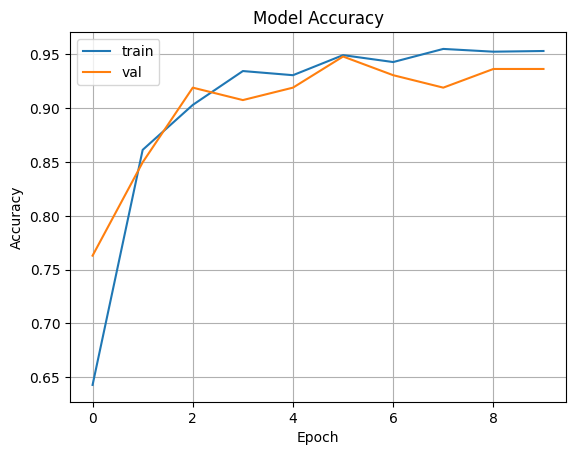

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


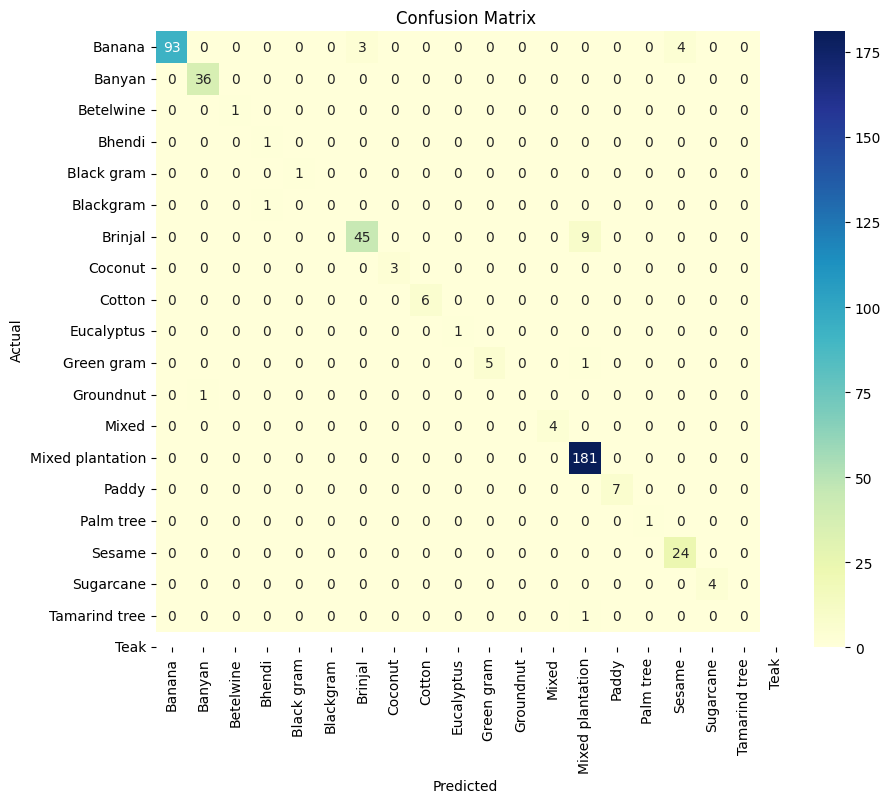

                  precision    recall  f1-score   support

          Banana       1.00      0.93      0.96       100
          Banyan       0.97      1.00      0.99        36
       Betelwine       1.00      1.00      1.00         1
          Bhendi       0.50      1.00      0.67         1
       Blackgram       1.00      1.00      1.00         1
         Brinjal       0.00      0.00      0.00         1
         Coconut       0.94      0.83      0.88        54
          Cotton       1.00      1.00      1.00         3
      Eucalyptus       1.00      1.00      1.00         6
      Green gram       1.00      1.00      1.00         1
       Groundnut       1.00      0.83      0.91         6
           Mixed       0.00      0.00      0.00         1
Mixed plantation       1.00      1.00      1.00         4
           Paddy       0.94      1.00      0.97       181
       Palm tree       1.00      1.00      1.00         7
          Sesame       1.00      1.00      1.00         1
       Sugarc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.utils.multiclass import unique_labels

present_labels = np.unique(y_test)
present_class_names = le.inverse_transform(present_labels)

print(classification_report(y_test, y_pred, labels=present_labels, target_names=present_class_names))



In [33]:
import os
import numpy as np
import tifffile as tiff
from tqdm import tqdm

image_data = []
labels = []
failed_ids = []

for idx, row in tqdm(meta.iterrows(), total=len(meta)):
    tif_path = os.path.join(img_dir, f"{row['UNIQUE_ID']}.tif")

    if os.path.exists(tif_path):
        try:
            tif = tiff.imread(tif_path)

            # Handle band dimensions
            if tif.ndim == 3 and tif.shape[2] >= 6:
                tif = tif[:, :, :6]  # Keep first 6 bands
            elif tif.ndim == 2:
                tif = np.stack([tif] * 6, axis=-1)
            else:
                failed_ids.append(row['UNIQUE_ID'])
                continue

            # Resize manually using numpy slicing or skimage (if installed)
            from skimage.transform import resize
            tif_resized = resize(tif, (64, 64, 6), preserve_range=True, anti_aliasing=True)
            tif_resized = tif_resized.astype(np.float32) / 255.0

            image_data.append(tif_resized)
            labels.append(row['CROP'])

        except Exception as e:
            print(f"Failed on {tif_path}: {e}")
            failed_ids.append(row['UNIQUE_ID'])
    else:
        failed_ids.append(row['UNIQUE_ID'])

X = np.array(image_data)
y_raw = np.array(labels)

print("✅ Successfully loaded:", len(X), "images")
print("❌ Failed or missing:", len(failed_ids), "files")


100%|██████████| 2370/2370 [00:29<00:00, 81.40it/s] 


✅ Successfully loaded: 2161 images
❌ Failed or missing: 209 files


In [34]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

class_counts = Counter(y_raw)
minor_classes = {cls for cls, count in class_counts.items() if count < 100}
labels_combined = ['Other' if label in minor_classes else label for label in y_raw]

le = LabelEncoder()
y_encoded = le.fit_transform(labels_combined)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [35]:
import numpy as np
label_distribution = dict(zip(le.classes_, np.bincount(y_encoded)))
print("Label distribution after grouping:", label_distribution)

Label distribution after grouping: {np.str_('Banana'): np.int64(499), np.str_('Banyan'): np.int64(180), np.str_('Coconut'): np.int64(271), np.str_('Other'): np.int64(186), np.str_('Paddy'): np.int64(904), np.str_('Sugarcane'): np.int64(121)}


<ipython-input-50-72c137748bd9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_distribution.keys()), y=list(label_distribution.values()), palette="Set2")


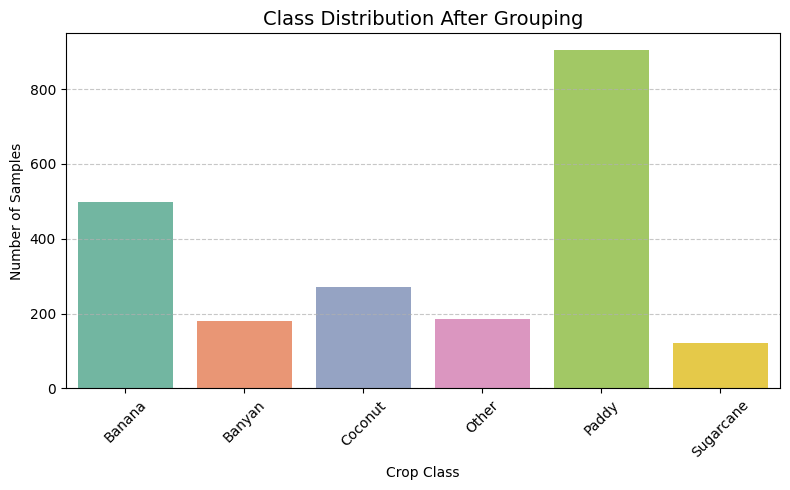

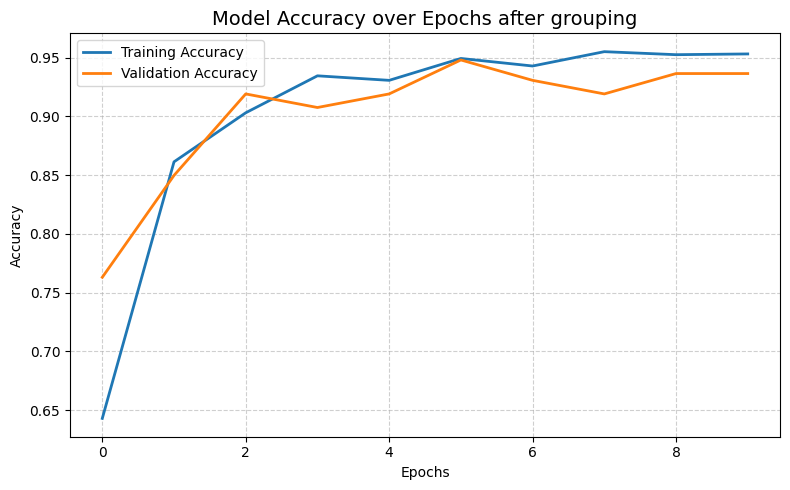

📄 Classification Report:
              precision    recall  f1-score   support

      Banana       0.59      0.55      0.57       100
      Banyan       0.49      0.50      0.49        36
     Coconut       0.00      0.00      0.00        55
       Other       0.00      0.00      0.00        37
       Paddy       0.00      0.00      0.00       181
   Sugarcane       0.00      0.00      0.00        24

   micro avg       0.54      0.17      0.26       433
   macro avg       0.18      0.18      0.18       433
weighted avg       0.18      0.17      0.17       433



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# === 1. Class Distribution Plot ===
plt.figure(figsize=(8, 5))
sns.barplot(x=list(label_distribution.keys()), y=list(label_distribution.values()), palette="Set2")
plt.title("Class Distribution After Grouping", fontsize=14)
plt.ylabel("Number of Samples")
plt.xlabel("Crop Class")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === 2. Accuracy Plot ===
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("Model Accuracy over Epochs after grouping", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# === 4. Classification Report ===
from sklearn.utils.multiclass import unique_labels

present_labels = np.unique(y_test)
present_class_names = le.inverse_transform(present_labels)

print("📄 Classification Report:")
print(classification_report(y_test, y_pred, labels=present_labels, target_names=present_class_names))


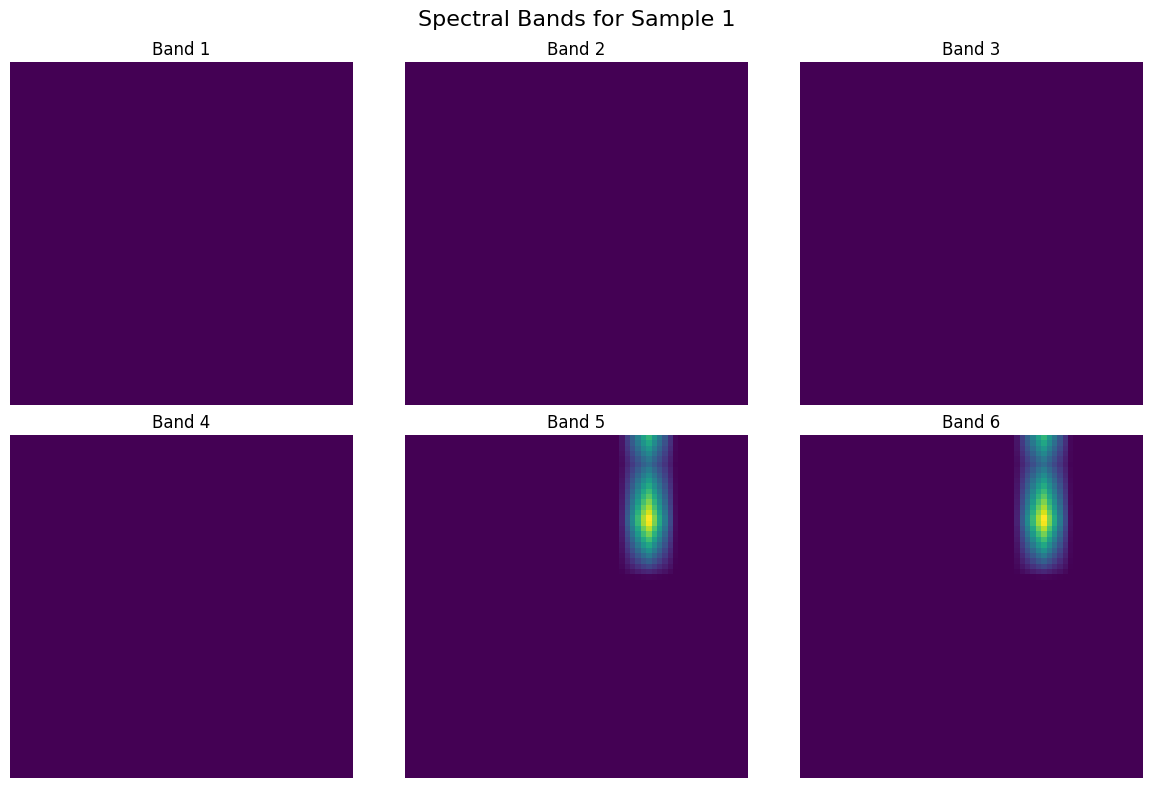

In [45]:
import matplotlib.pyplot as plt

sample_idx = 1  # change to any index
bands = X[sample_idx]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Spectral Bands for Sample {sample_idx}", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(bands[:, :, i], cmap='viridis')
    ax.set_title(f"Band {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


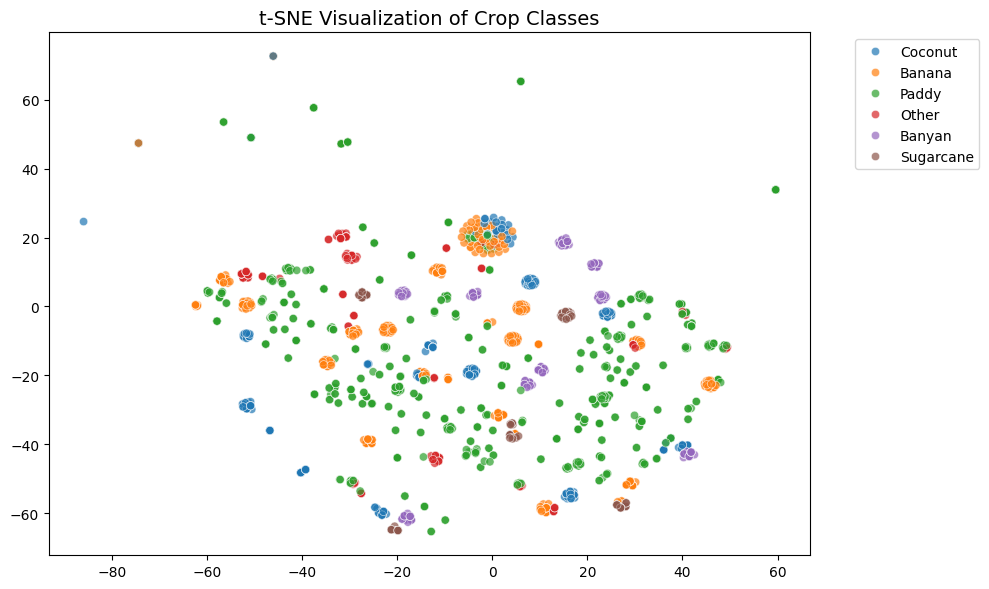

In [47]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Flatten the images
X_flat = X.reshape(X.shape[0], -1)

# Reduce dimensions
X_pca = PCA(n_components=50).fit_transform(X_flat)
X_embedded = TSNE(n_components=2, perplexity=30).fit_transform(X_pca)

# Plot of learned image features in 2D to show clustering/separation between crop types.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=le.inverse_transform(y_encoded), palette='tab10', alpha=0.7)
plt.title("t-SNE Visualization of Crop Classes", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


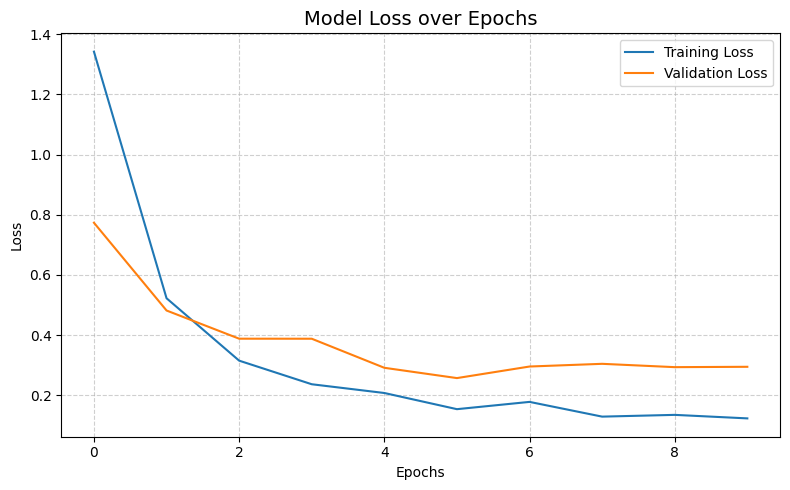

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
